### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### EDA

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### To check the num of unique values in each column

In [8]:
df.nunique().to_frame('No of unique values')

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observations


. Our dataset contains 614 rows and 13 columns in which 'Loan_Status' one is target variable

. Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are of object type and remaining of numerical

. Null values are there

. 'Loan_ID' is only for identification perpose we can delete it later

. 'min' is zero for 'CoapplicantIncome' and 'Credit_History' which is irrelavent

### Deleting unwanted column 'Loan_ID'

In [84]:
df.drop(['Loan_ID'], inplace=True, axis=1)

### Lets visualize the distribution of our target variable using countplot

The percentage of Y class : 0.69
The percentage of N class : 0.31


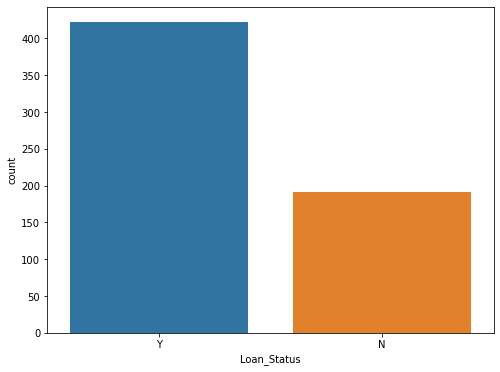

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

### Visualising that how the target variable is distributed over 'Gender' feature

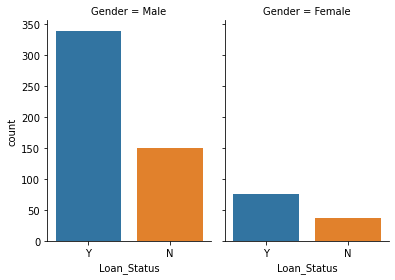

In [13]:
g = sns.catplot(x="Loan_Status", col="Gender",
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Married' feature

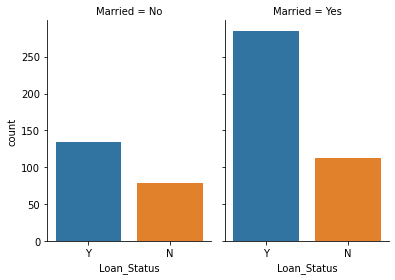

In [14]:
g = sns.catplot(x="Loan_Status", col='Married',
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Dependents'

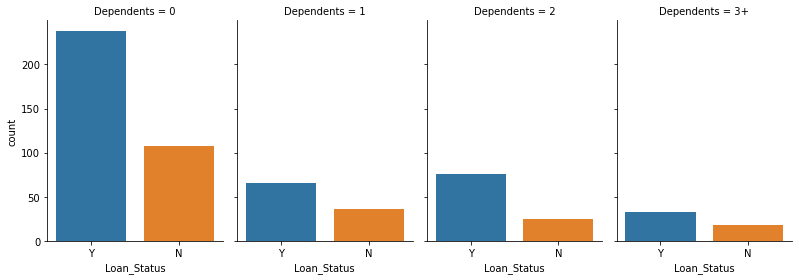

In [16]:
g = sns.catplot(x="Loan_Status", col='Dependents',
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Education'

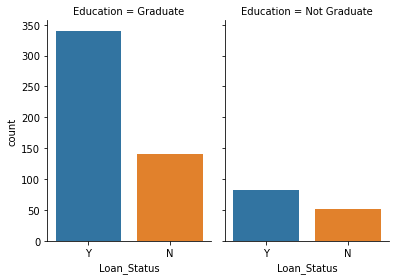

In [18]:
g = sns.catplot(x="Loan_Status", col= 'Education',
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Self_Employed'

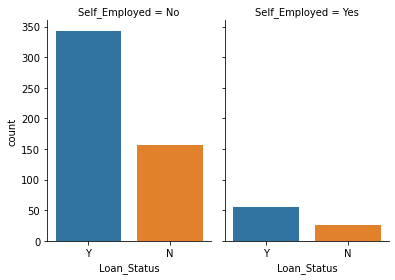

In [19]:
g = sns.catplot(x="Loan_Status", col=    'Self_Employed', 
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Credit_History'

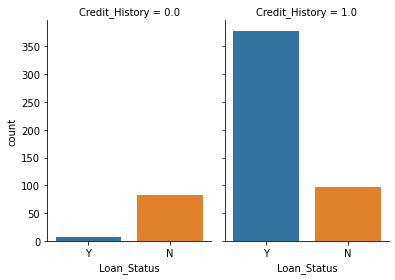

In [20]:
g = sns.catplot(x="Loan_Status", col = 'Credit_History',
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Property_Area'

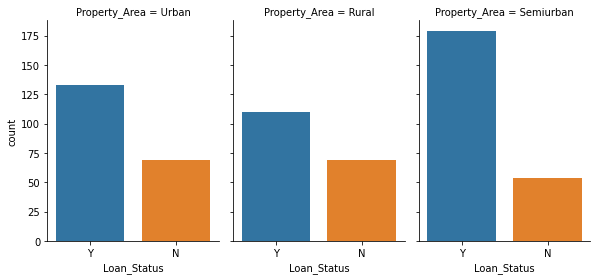

In [23]:
g = sns.catplot(x="Loan_Status", col= 'Property_Area',
                data=df, kind="count",
                height=4, aspect=.7);

### Relation between 'Loan_Status' and 'Loan_Amount_Term'

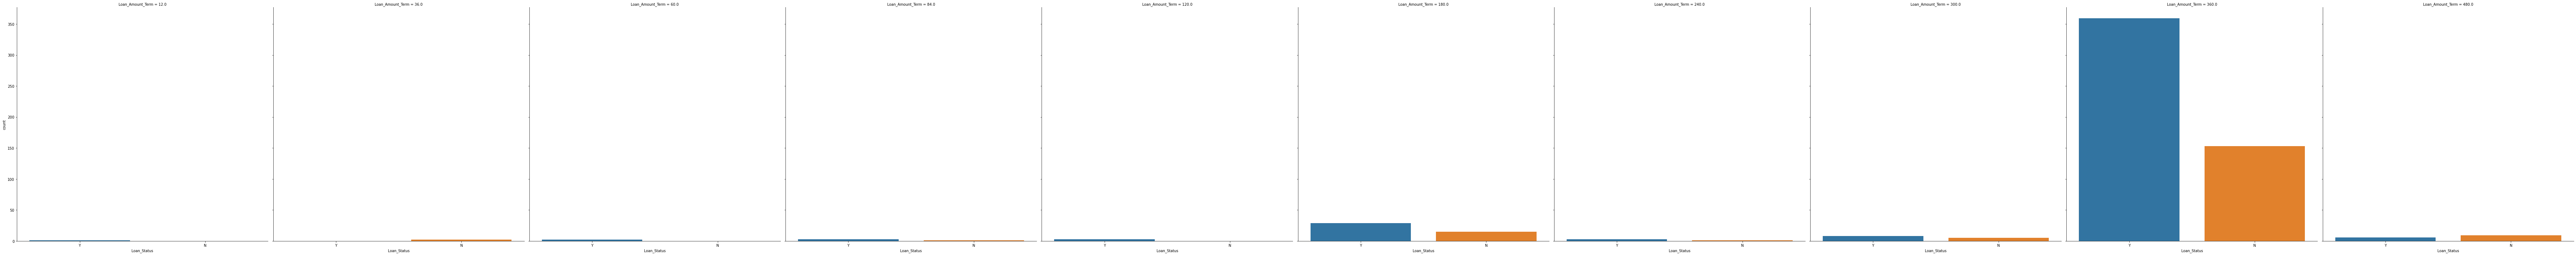

In [24]:
g = sns.catplot(x="Loan_Status", col= 'Loan_Amount_Term',
                data=df, kind="count",
                height=10, aspect=1);

### Relation between 'Loan_Status' and 'ApplicantIncome' 

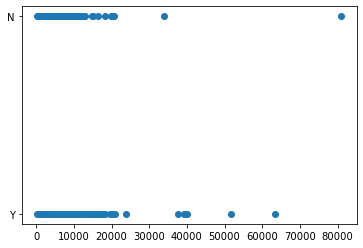

In [25]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

### Relation between 'Loan_Status' and 'CoapplicantIncome'

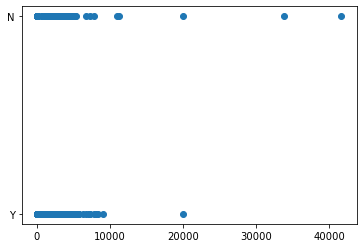

In [26]:
plt.scatter(df['CoapplicantIncome'], df['Loan_Status']);

### Plots above convey following things about the dataset:

#### Loan Approval Status: About 2/3rd of applicants have been granted loan.

#### Sex: There are more Men than Women.

#### Marital Status: Married applicants are more likely to be granted loans.

#### Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

#### Education: Graduates have higher propotion of loan approval.

#### Employment: Most of population is not self employed.

#### Property Area: More applicants from Semi-urban and also likely to be granted loans.

#### Applicant with credit history are far more likely to be accepted.

#### Loan Amount Term: Majority of the loans taken are for 360 Months 

### Now it's time to impute null values

In [37]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
#checking for categorical data
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print('categorical columns: ', categorical_col)
print('\n')

#checking for numerical data
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'float64' or 'int64':
        numerical_col.append(i)
print('numerical columns: ', numerical_col)
print('\n')

categorical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']




In [86]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [87]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [88]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


### Fill non-null values by backward.


In [89]:
num_data.fillna(method = 'bfill',inplace = True)

In [90]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### Fill categorical null values with label encoder

In [91]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder() 
  

In [92]:
cat_data = cat_data.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [93]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [94]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


### Now concate both data

In [95]:
df = pd.concat([cat_data, num_data], axis=1)

In [96]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


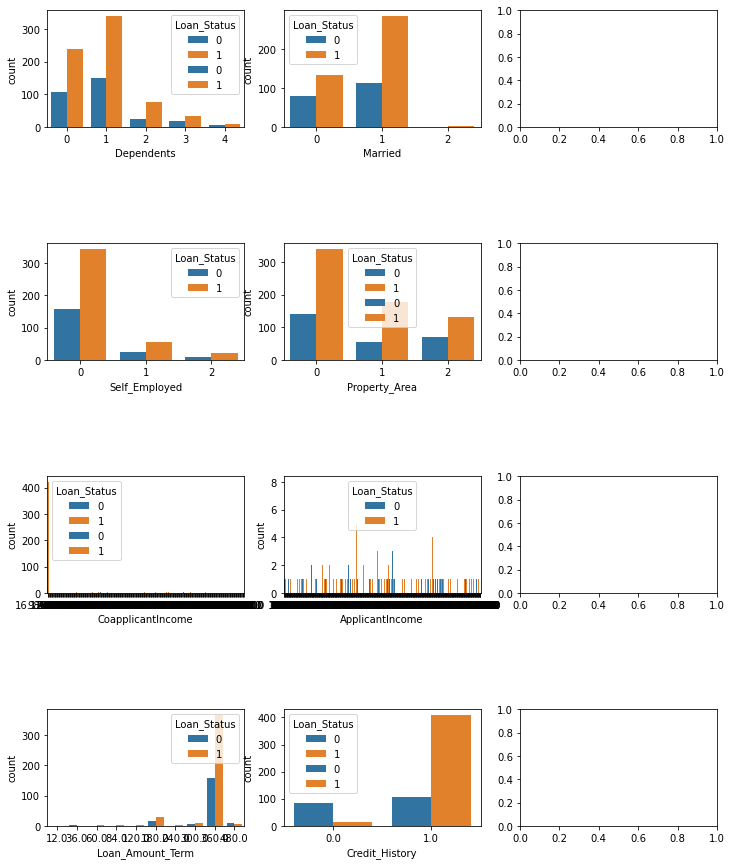

In [59]:
fig,axes = plt.subplots(4,3,figsize=(12,15))
for idx,cat_col in enumerate(df):
    row,col = idx//3,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

### Let's check outliers

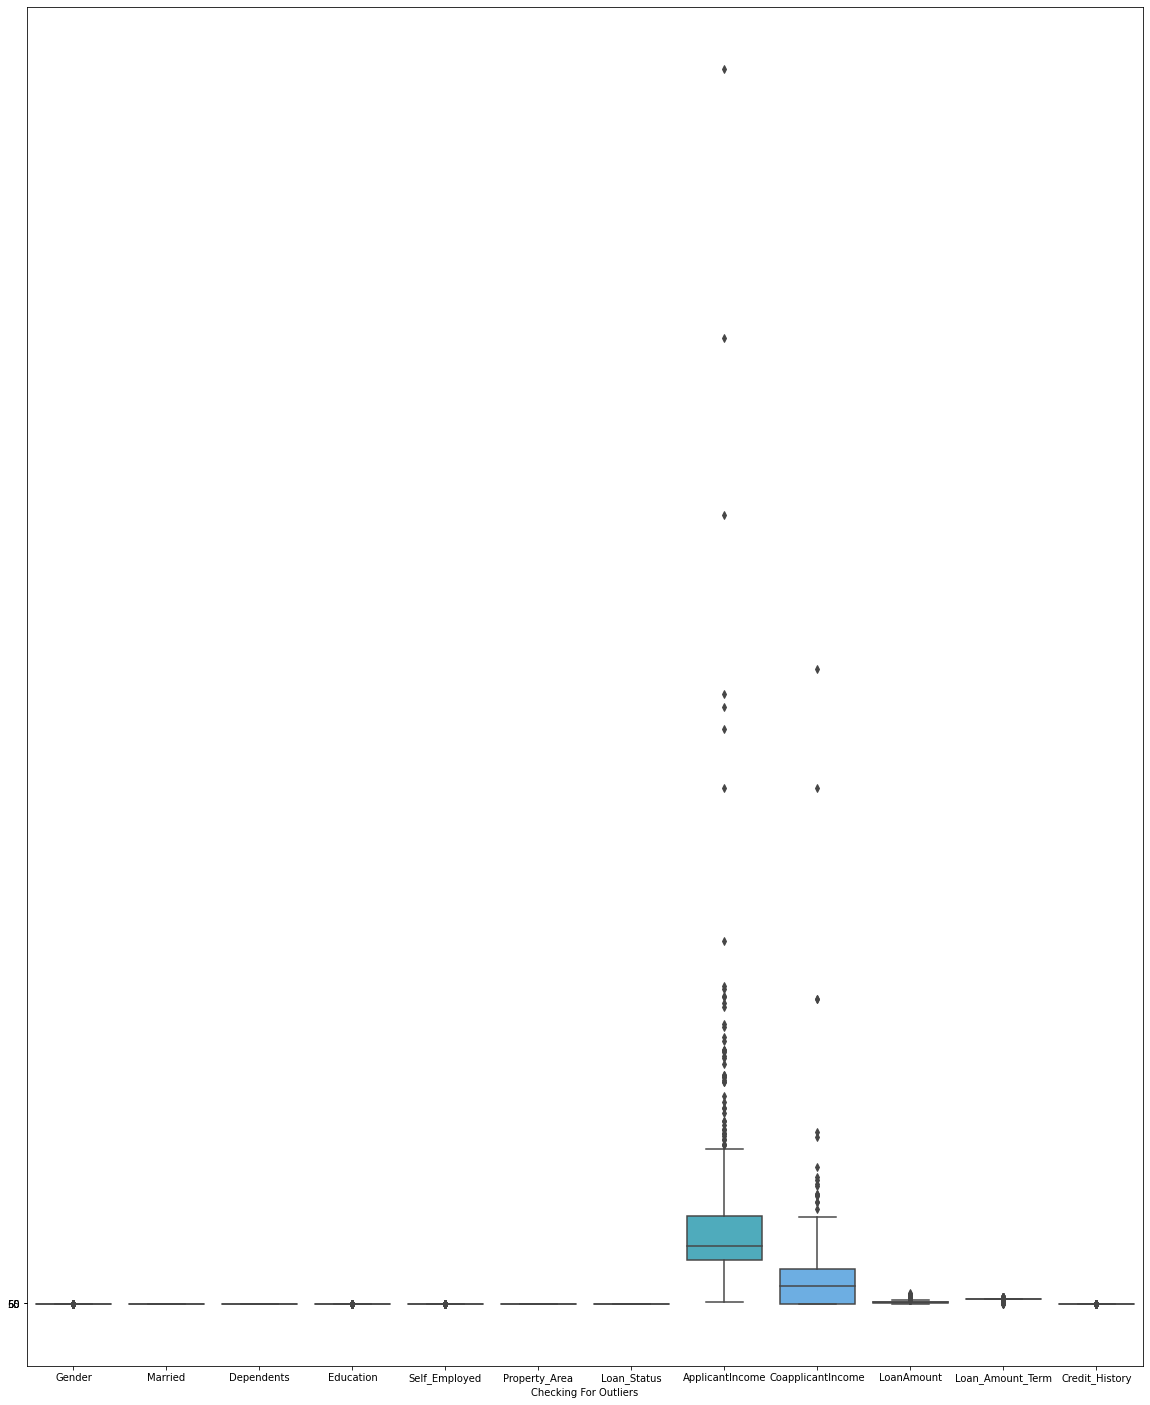

In [60]:
# boxplot

plt.figure(figsize=(20,25))     

ax = sns.boxplot(data=df)   

plt.yticks(range(50,61,5))     

plt.xlabel('Checking For Outliers')

plt.show()

### Removing  outliers from corresponding columns

In [97]:
var_with_outliers = df[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(var_with_outliers))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.217057,0.273231
1,0.134412,0.038732,0.217057,0.273231
2,0.393747,0.554487,0.947774,0.273231
3,0.462062,0.251980,0.311343,0.273231
4,0.097728,0.554487,0.063843,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.888845,0.273231
610,0.212557,0.554487,1.254204,2.522836
611,0.437174,0.472404,1.256161,0.273231
612,0.357064,0.554487,0.478302,0.273231


### Create new dataframe which presents features without outliers

In [98]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


### Check for dataloss

In [99]:
# Total Data Loss 
dataloss=(614-578)/614
dataloss*100

5.863192182410423

### Dataloss is less than 10% so we can proceed furhter

### Finding Skewness

In [70]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
Property_Area       -0.066196
Loan_Status         -0.809998
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.681926
Loan_Amount_Term    -2.402112
Credit_History      -1.880101
dtype: float64

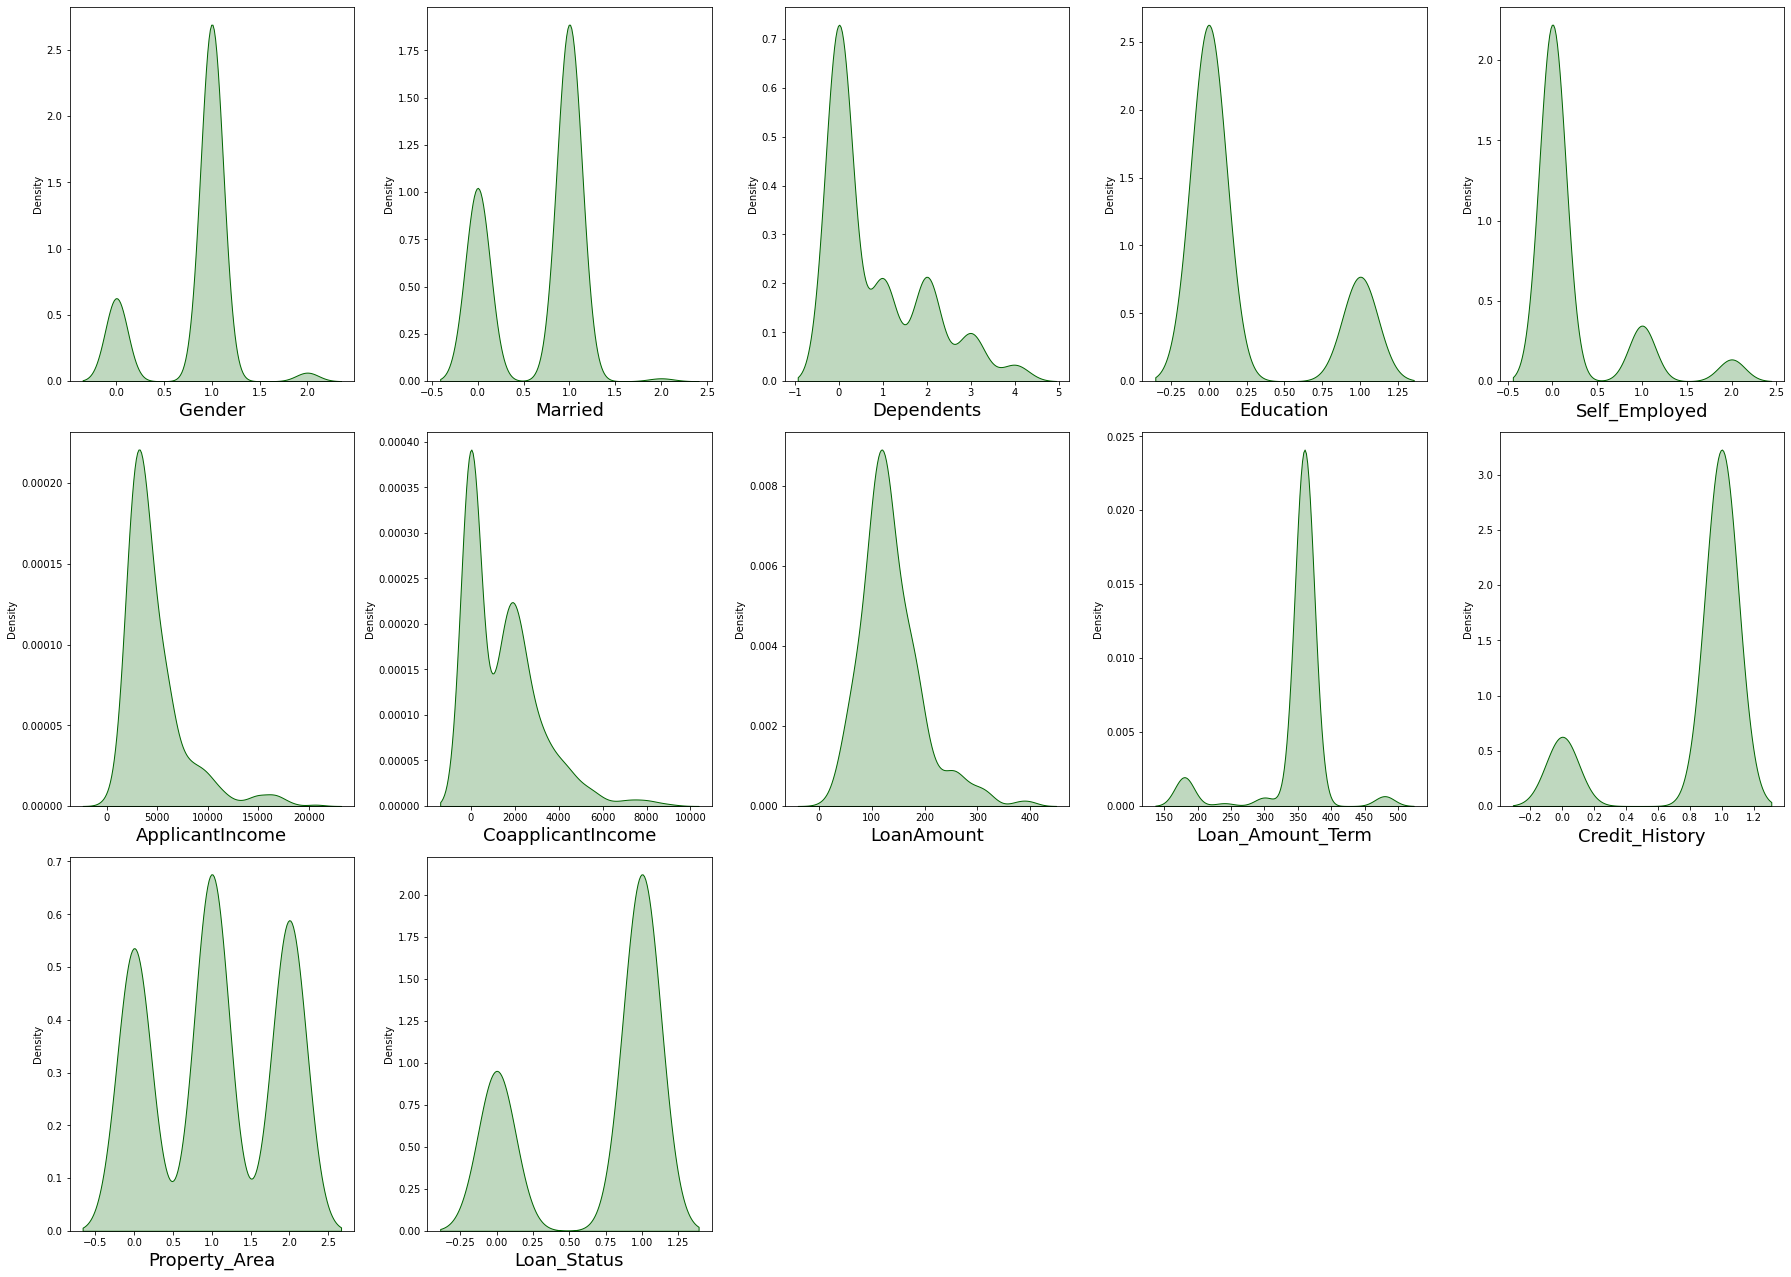

In [71]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=27:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(new_df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

### Removing Skewness using cuberoot method from the respective columns

In [81]:
df['Dependents'] = np.cbrt(df['Dependents'])
df['Education'] = np.cbrt(df['Education'])
df['Self_Employed'] = np.cbrt(df['Self_Employed'])
df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.cbrt(df['LoanAmount'])

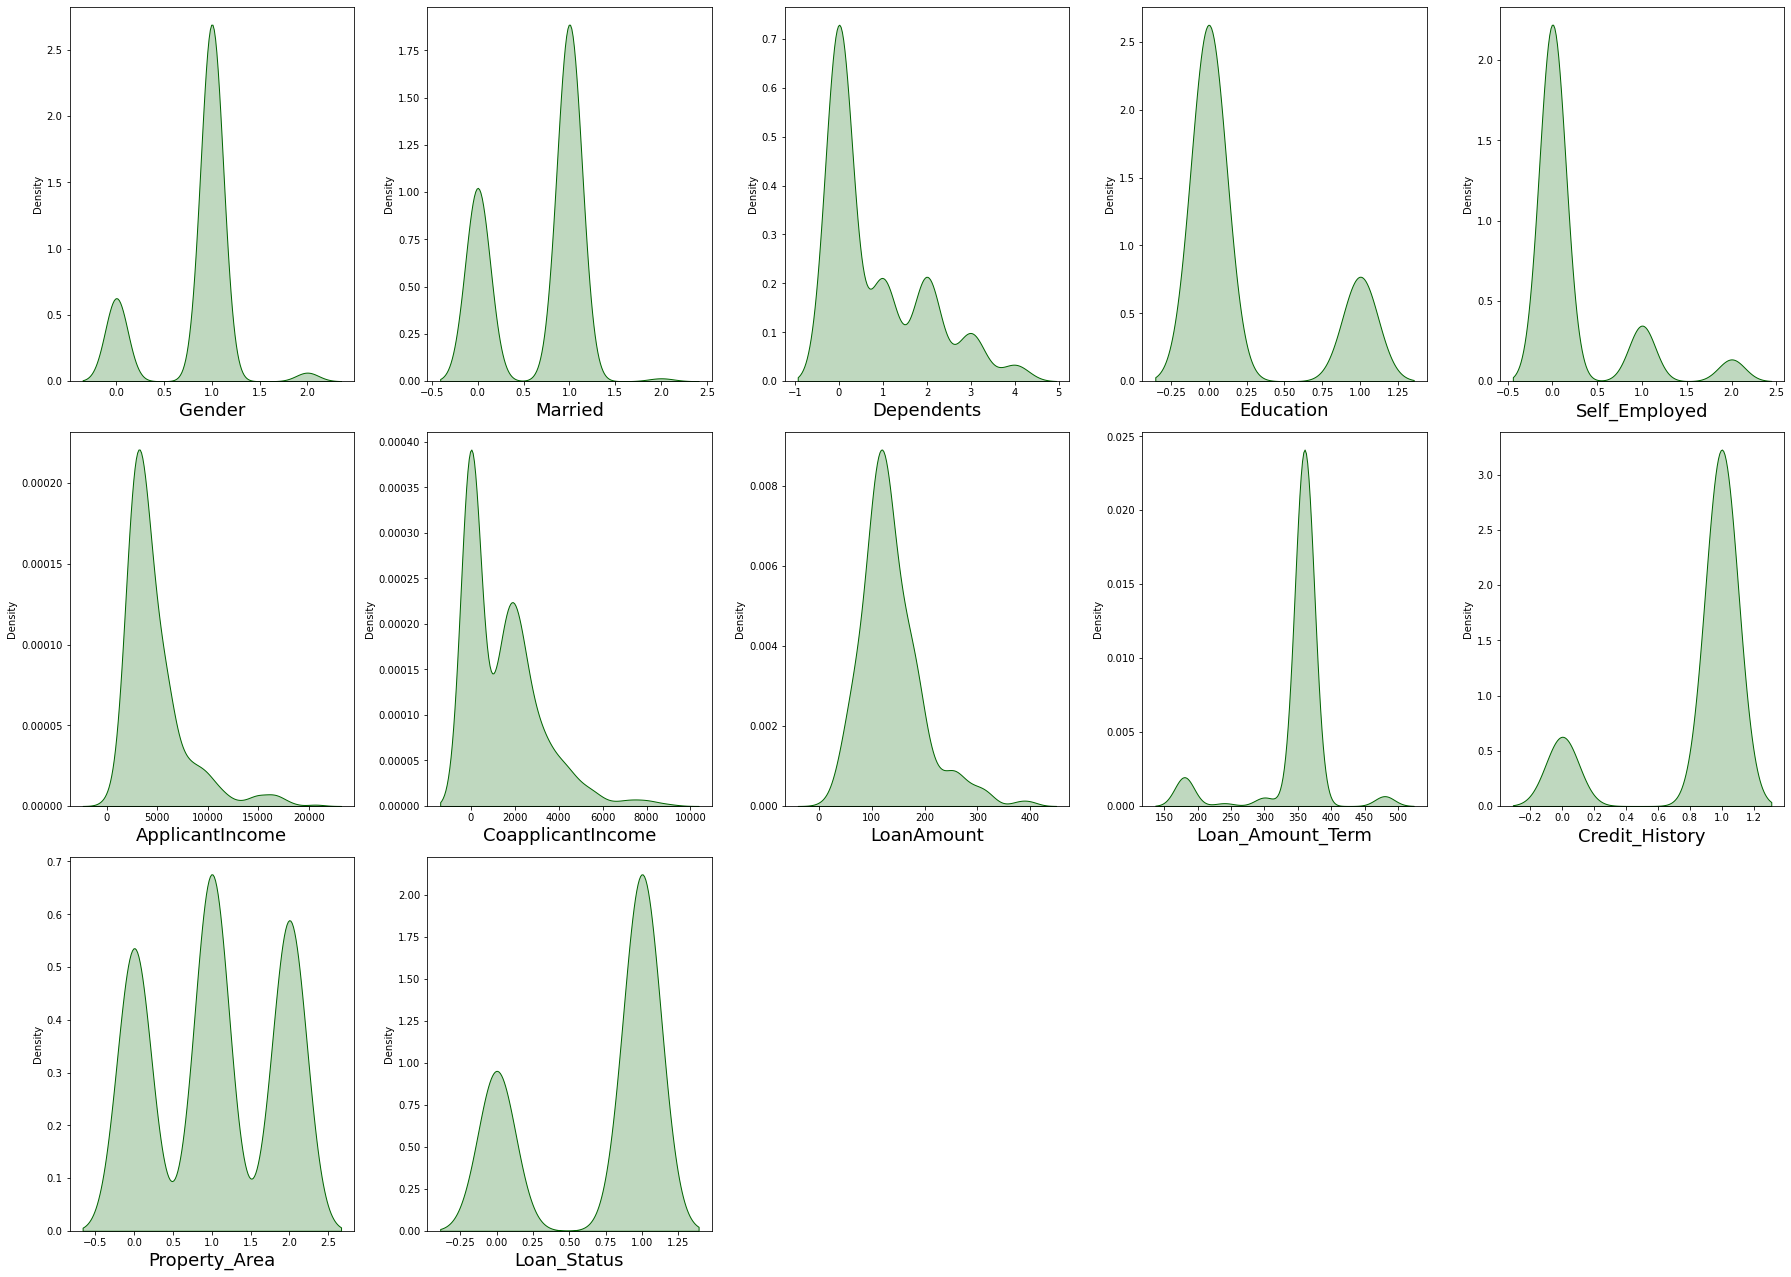

In [82]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=27:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(new_df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

### Now check the correlation betwee the target and features

In [103]:
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.346954,0.159601,0.027122,0.000942,-0.032201,0.002403,0.053577,0.223664,0.187186,-0.100711,0.004324
Married,0.346954,1.000000,0.363019,0.017876,-0.033001,0.012862,0.095268,-0.014213,0.321553,0.171234,-0.122140,0.015791
Dependents,0.159601,0.363019,1.000000,0.063803,0.053449,0.058444,0.007316,0.127701,0.006409,0.120824,-0.088204,-0.066602
Education,0.027122,0.017876,0.063803,1.000000,-0.014535,-0.067255,-0.093227,-0.177308,0.050819,-0.128991,-0.090713,-0.097375
Self_Employed,0.000942,-0.033001,0.053449,-0.014535,1.000000,-0.034473,-0.010663,0.153871,-0.065823,0.096248,-0.028799,0.021693
Property_Area,-0.032201,0.012862,0.058444,-0.067255,-0.034473,1.000000,0.024944,-0.017384,-0.071715,-0.101959,-0.057438,-0.013270
Loan_Status,0.002403,0.095268,0.007316,-0.093227,-0.010663,0.024944,1.000000,0.000784,0.077966,-0.025626,-0.020015,0.536285
ApplicantIncome,0.053577,-0.014213,0.127701,-0.177308,0.153871,-0.017384,0.000784,1.000000,-0.363475,0.423620,-0.067967,0.043128
CoapplicantIncome,0.223664,0.321553,0.006409,0.050819,-0.065823,-0.071715,0.077966,-0.363475,1.000000,0.203417,0.000569,0.013564
LoanAmount,0.187186,0.171234,0.120824,-0.128991,0.096248,-0.101959,-0.025626,0.423620,0.203417,1.000000,0.053662,0.015324


### Visualise the same by using 'heatmap'

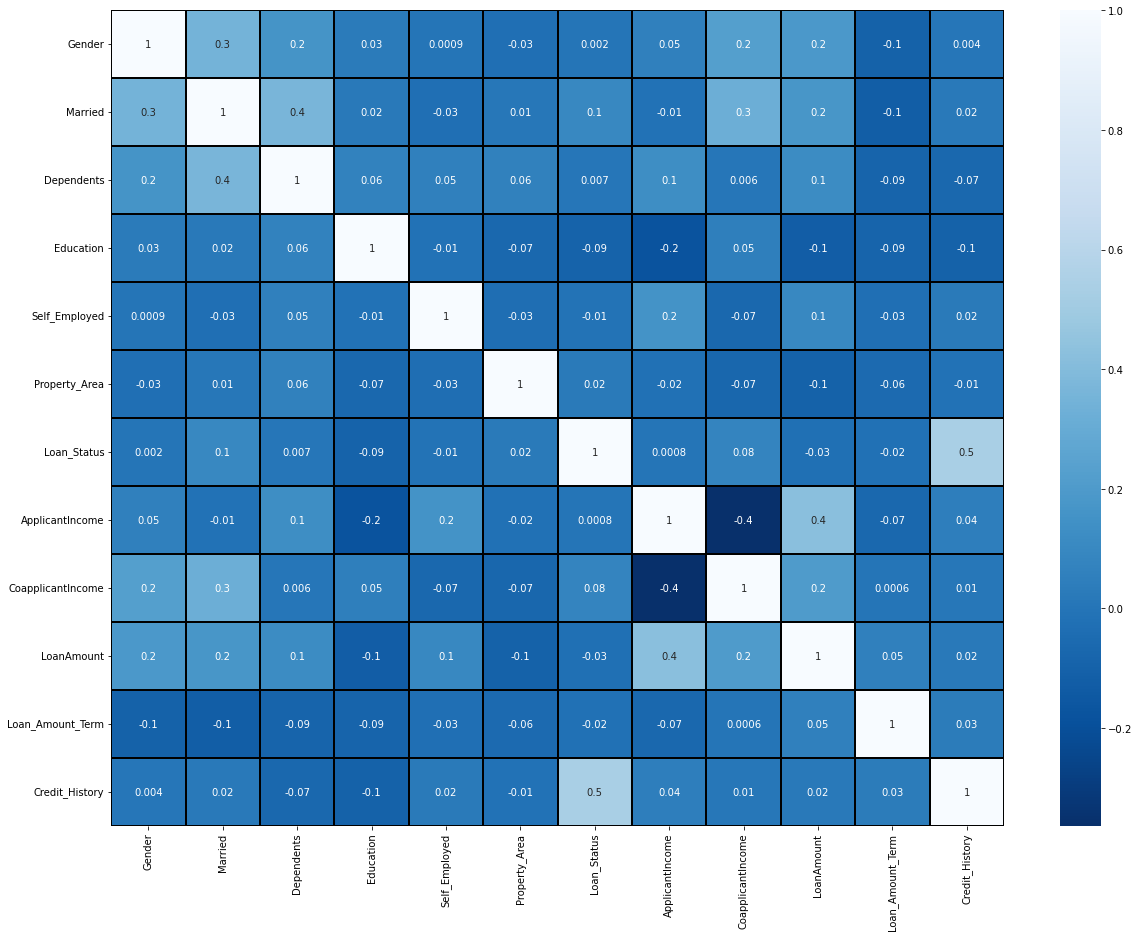

In [104]:
plt.figure(figsize = (20,15))
sns.heatmap(new_df.corr(),linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation=0);
plt.show()

### From above heatmap we can assume that there is multicollinearity issue in our dataset

### Model Building

### Saperating features and label columns

In [106]:
x=new_df.drop('Loan_Status',axis=1)
y=new_df['Loan_Status']


### Feature scaling by using StandardScalar

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.395266,-1.349370,-0.849794,-0.541355,-0.465659,1.228984,0.674061,-1.120361,-0.005319,0.230643,0.440698
1,0.395266,0.708508,0.765071,-0.541355,-0.465659,-1.303468,0.230318,0.746604,-0.005319,0.230643,0.440698
2,0.395266,0.708508,-0.849794,-0.541355,2.140889,1.228984,-0.527691,-1.120361,-1.419902,0.230643,0.440698
3,0.395266,0.708508,-0.849794,1.847218,-0.465659,1.228984,-0.791553,0.897576,-0.155664,0.230643,0.440698
4,0.395266,-1.349370,-0.849794,-0.541355,-0.465659,1.228984,0.720747,-1.120361,0.225435,0.230643,0.440698
...,...,...,...,...,...,...,...,...,...,...,...
573,-1.984564,-1.349370,-0.849794,-0.541355,-0.465659,-1.303468,-0.587637,-1.120361,-1.277262,0.230643,0.440698
574,0.395266,0.708508,1.478774,-0.541355,-0.465659,-1.303468,0.032154,-1.120361,-2.317903,-3.247046,0.440698
575,0.395266,0.708508,0.765071,-0.541355,-0.465659,1.228984,1.268522,0.177588,1.768500,0.230643,0.440698
576,0.395266,0.708508,1.250759,-0.541355,-0.465659,1.228984,1.152442,-1.120361,0.937738,0.230643,0.440698


### Now our data is ready for Model Building1

### Spliting data into train and test sets

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=130)

### Importing Classification Alogorithms:

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### DecisionTreeClassifier

In [112]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
pred = DTC.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7068965517241379
[[32 21]
 [30 91]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        53
           1       0.81      0.75      0.78       121

    accuracy                           0.71       174
   macro avg       0.66      0.68      0.67       174
weighted avg       0.72      0.71      0.71       174

0.7266866566716642


### RandomForestClassifier

In [113]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

#Prediction
pred = RFC.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Cross Validation Score",cross_val_score(RFC,x,y,cv=5).mean()*100)

83.33333333333334
[[ 32  21]
 [  8 113]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        53
           1       0.84      0.93      0.89       121

    accuracy                           0.83       174
   macro avg       0.82      0.77      0.79       174
weighted avg       0.83      0.83      0.83       174

Cross Validation Score 79.42278860569716


### SVM

In [114]:
SVM = SVC()
SVM.fit(x_train,y_train)

#Prediction
pred = SVM.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Cross Validation Score",cross_val_score(SVM,x,y,cv=5).mean()*100)

83.9080459770115
[[ 30  23]
 [  5 116]]
              precision    recall  f1-score   support

           0       0.86      0.57      0.68        53
           1       0.83      0.96      0.89       121

    accuracy                           0.84       174
   macro avg       0.85      0.76      0.79       174
weighted avg       0.84      0.84      0.83       174

Cross Validation Score 81.15292353823088


### KNN

In [115]:
knn = KNN()
knn.fit(x_train,y_train)

#Prediction
pred = knn.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Cross Validation Score",cross_val_score(knn,x,y,cv=5).mean()*100)

81.60919540229885
[[ 29  24]
 [  8 113]]
              precision    recall  f1-score   support

           0       0.78      0.55      0.64        53
           1       0.82      0.93      0.88       121

    accuracy                           0.82       174
   macro avg       0.80      0.74      0.76       174
weighted avg       0.81      0.82      0.81       174

Cross Validation Score 79.07646176911544


### BaggingClassifier

In [116]:
BC= BaggingClassifier()
BC.fit(x_train,y_train)

#Prediction
pred = BC.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,x,y,cv=5).mean()*100)

78.73563218390804
[[ 35  18]
 [ 19 102]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65        53
           1       0.85      0.84      0.85       121

    accuracy                           0.79       174
   macro avg       0.75      0.75      0.75       174
weighted avg       0.79      0.79      0.79       174

Corross Validation Score 77.34782608695653


### GradientBoostingClassifier

In [117]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

#Prediction
pred = GBC.predict(x_test)
#Accuracy
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,x,y,cv=5).mean()*100)

79.3103448275862
[[ 31  22]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        53
           1       0.83      0.88      0.86       121

    accuracy                           0.79       174
   macro avg       0.76      0.73      0.74       174
weighted avg       0.79      0.79      0.79       174

Corross Validation Score 78.2143928035982


### From SVC() we get highest accuracy

In [142]:
#initialising GradientBoost with best parameter
Loan_Model= BaggingClassifier()

In [143]:
Loan_Model.fit(x_train, y_train)
pred = Loan_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 75.28735632183908


## Using SVC we get 83.90% accuracy

### Saving the model

In [150]:
#initialising GradientBoost with best parameter
Loan_Model=SVC()

In [151]:
Loan_Model.fit(x_train, y_train)
pred = Loan_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 83.9080459770115


In [144]:
import joblib
joblib.dump(Loan_Model,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

### Loading the model

In [145]:
# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

## Conclusion:-
### Our model for d prediction of 'Loan_Status' achived an accuracy of 83.90% using Support Vector Model
